In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from transformers import MBart50TokenizerFast, MBartForConditionalGeneration

# Load the fine-tuned model
model_name = "abdulwaheed1/english-to-urdu-translation-mbart"
tokenizer = MBart50TokenizerFast.from_pretrained(model_name, src_lang="en_XX", tgt_lang="ur_PK")
model = MBartForConditionalGeneration.from_pretrained(model_name)

In [ ]:
# Input text for translation
input_text = "My name is Ali"
inputs = tokenizer(input_text, return_tensors="pt")

# Perform forward pass with attention outputs
outputs = model.generate(
    inputs["input_ids"],
    return_dict_in_generate=True,
    output_scores=True,
    output_attentions=True
)

# Attention weights
decoder_attentions = outputs.decoder_attentions  # Decoder self-attention
cross_attentions = outputs.cross_attentions  # Encoder-decoder cross-attention


In [ ]:
print(decoder_attentions)

((tensor([[[[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]]],


        [[[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]]],


        [[[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]]],


        [[[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

         [[1.]],

  

In [ ]:
layer_index = -1  # Last layer
head_index = 0    # First head

# Check the structure of cross_attentions
print(type(cross_attentions))  # Should be a tuple
print(len(cross_attentions))  # Number of layers
print(type(cross_attentions[layer_index]))  # Check type for the last layer


<class 'tuple'>
10
<class 'tuple'>


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **

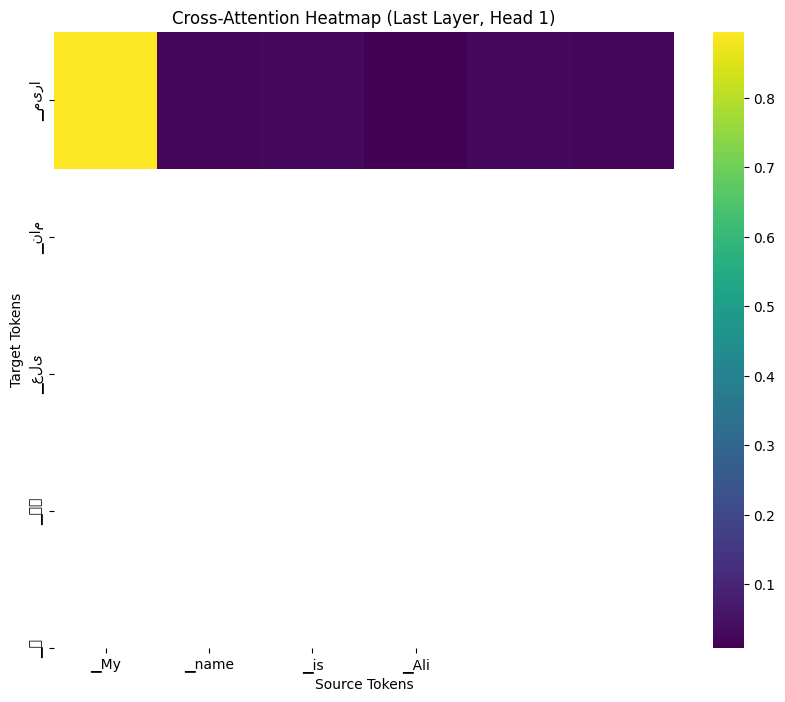

In [ ]:
## Extract the last layer's attention weights
attention_tensor = cross_attentions[layer_index]  # Extract the tensor for the last layer
# If this is a tuple, extract the tensor within it
if isinstance(attention_tensor, tuple):
    attention_tensor = attention_tensor[0]  # Extract the first element (batch size)

# Select the first batch, head, and reshape to (target_len, source_len)
attention_weights = attention_tensor[0, head_index].detach().numpy()  # Shape: (target_len, source_len)

# Tokenize input and output for labels
source_tokens = tokenizer.tokenize(input_text)
output_ids = outputs.sequences.squeeze().tolist()  # Assuming `outputs.sequences` contains generated IDs
target_tokens = tokenizer.convert_ids_to_tokens(output_ids, skip_special_tokens=True)

# Ensure labels match dimensions of attention_weights
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights, cmap="viridis", xticklabels=source_tokens, yticklabels=target_tokens)
plt.title("Cross-Attention Heatmap (Last Layer, Head 1)")
plt.xlabel("Source Tokens")
plt.ylabel("Target Tokens")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **

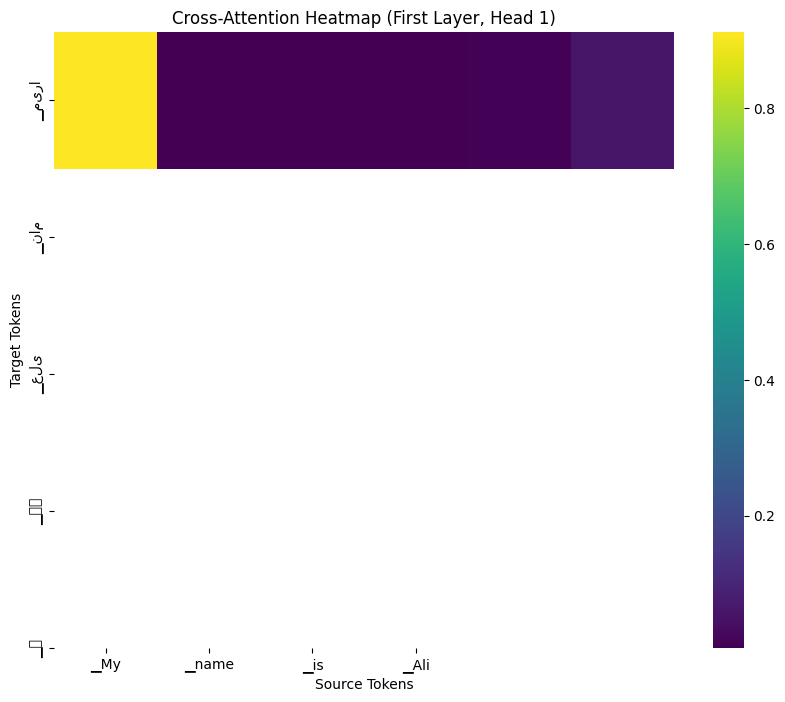

In [ ]:
## Extract the last layer's attention weights
attention_tensor = cross_attentions[0]  # Extract the tensor for the last layer
# If this is a tuple, extract the tensor within it
if isinstance(attention_tensor, tuple):
    attention_tensor = attention_tensor[0]  # Extract the first element (batch size)

# Select the first batch, head, and reshape to (target_len, source_len)
attention_weights = attention_tensor[0, head_index].detach().numpy()  # Shape: (target_len, source_len)

# Tokenize input and output for labels
source_tokens = tokenizer.tokenize(input_text)
output_ids = outputs.sequences.squeeze().tolist()  # Assuming `outputs.sequences` contains generated IDs
target_tokens = tokenizer.convert_ids_to_tokens(output_ids, skip_special_tokens=True)

# Ensure labels match dimensions of attention_weights
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights, cmap="viridis", xticklabels=source_tokens, yticklabels=target_tokens)
plt.title("Cross-Attention Heatmap (First Layer, Head 1)")
plt.xlabel("Source Tokens")
plt.ylabel("Target Tokens")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **

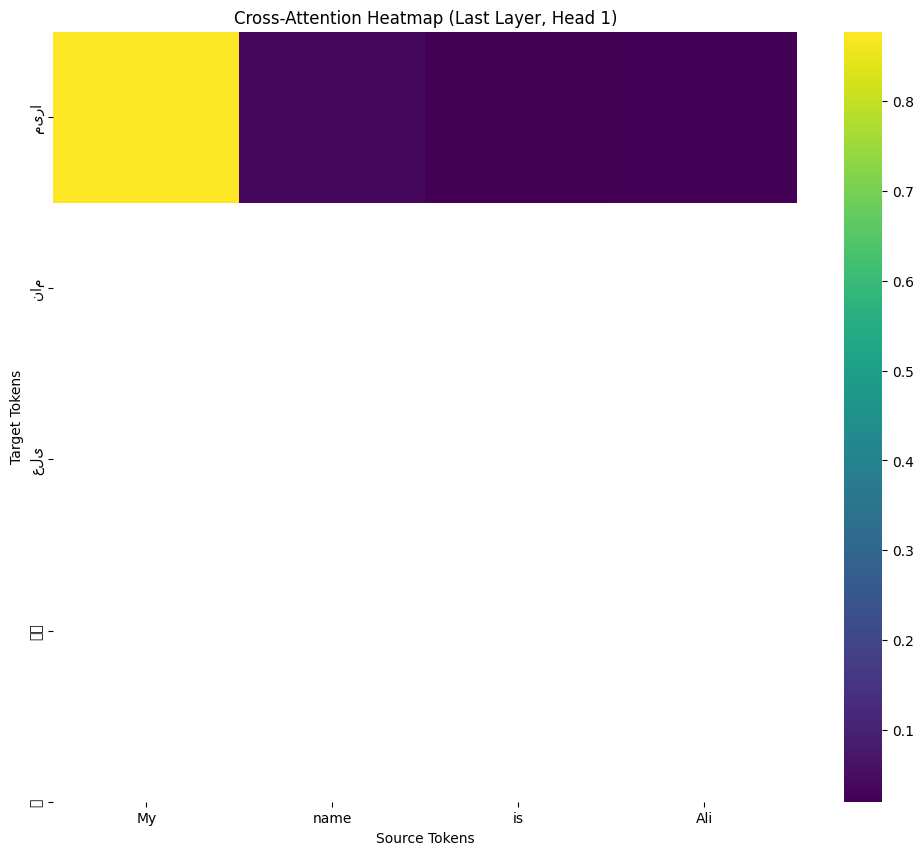

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract attention weights for the last layer and first head
layer_index = -1  # Last layer
head_index = 10   # First head

# Extract cross-attention tensor (shape: [batch_size, num_heads, target_len, source_len])
attention_tensor = cross_attentions[layer_index]  # Get the last layer
if isinstance(attention_tensor, tuple):
    attention_tensor = attention_tensor[0]  # If it's a tuple, extract the tensor

# Get attention weights for the first batch and head
attention_weights = attention_tensor[0, head_index].detach().numpy()  # Shape: (target_len, source_len)

# Tokenize input and output
source_tokens = tokenizer.tokenize(input_text)  # Tokenize source sentence
output_ids = outputs.sequences.squeeze().tolist()  # Get generated token IDs
target_tokens = tokenizer.convert_ids_to_tokens(output_ids, skip_special_tokens=True)  # Decode tokens

# Combine subword tokens (optional: for cleaner visualization)
def combine_subwords(tokens):
    combined_tokens = []
    for token in tokens:
        if token.startswith("▁"):  # MBart uses "▁" to indicate the start of a new word
            combined_tokens.append(token[1:])  # Remove "▁"
        else:
            combined_tokens[-1] += token  # Append to the previous token
    return combined_tokens

source_tokens = combine_subwords(source_tokens)
target_tokens = combine_subwords(target_tokens)

# Ensure labels match dimensions of attention_weights
attention_weights = attention_weights[:len(target_tokens), :len(source_tokens)]  # Match matrix dimensions to tokens
plt.figure(figsize=(12, 10))
sns.heatmap(attention_weights, cmap="viridis", xticklabels=source_tokens, yticklabels=target_tokens)
plt.title("Cross-Attention Heatmap (Last Layer, Head 1)")
plt.xlabel("Source Tokens")
plt.ylabel("Target Tokens")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **

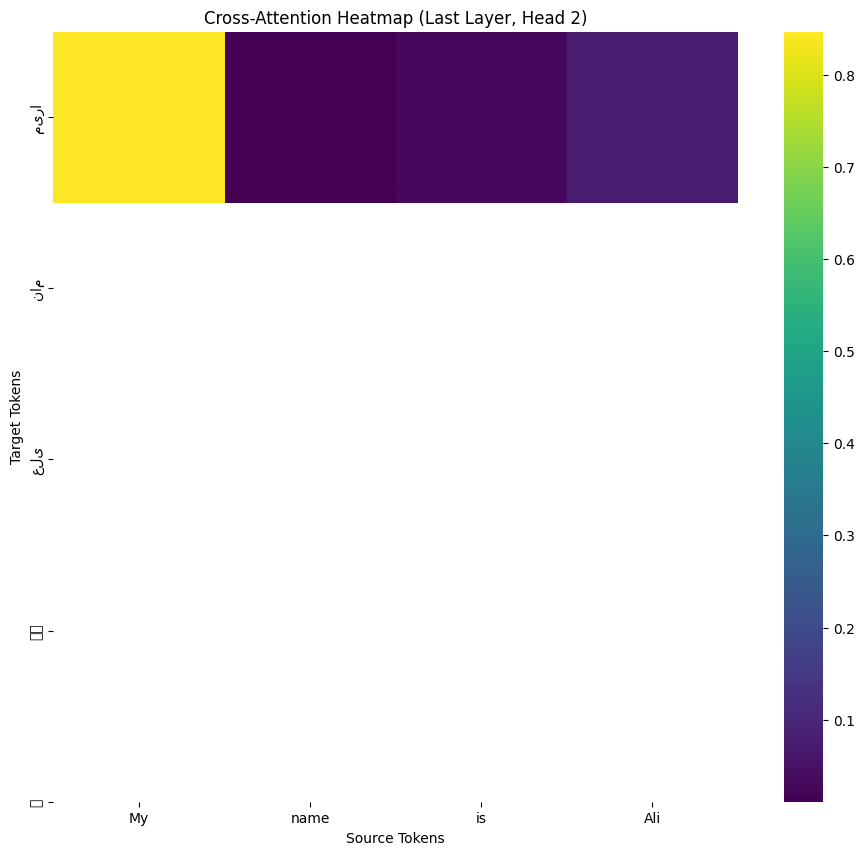

In [ ]:
# Input sentence
input_text = "My name is Ali"

# Extract attention weights for the last layer and head 2
layer_index = 3  # Last layer
head_index = 1    # Head 2 (index 1)

# Extract cross-attention tensor (shape: [batch_size, num_heads, target_len, source_len])
attention_tensor = cross_attentions[layer_index]  # Get the last layer
if isinstance(attention_tensor, tuple):
    attention_tensor = attention_tensor[0]  # If it's a tuple, extract the tensor

# Get attention weights for the first batch and head
attention_weights = attention_tensor[0, head_index].detach().numpy()  # Shape: (target_len, source_len)

# Tokenize input and output
source_tokens = tokenizer.tokenize(input_text)  # Tokenize source sentence
output_ids = outputs.sequences.squeeze().tolist()  # Get generated token IDs
target_tokens = tokenizer.convert_ids_to_tokens(output_ids, skip_special_tokens=True)  # Decode tokens

# Combine subword tokens (optional: for cleaner visualization)
def combine_subwords(tokens):
    combined_tokens = []
    temp_token = ''
    for token in tokens:
        if token.startswith("▁"):  # MBart uses "▁" to indicate the start of a new word
            if temp_token:
                combined_tokens.append(temp_token)
            temp_token = token[1:]  # Start new word without "▁"
        else:
            temp_token += token  # Append subword part
    combined_tokens.append(temp_token)  # Add the last token
    return combined_tokens

source_tokens = combine_subwords(source_tokens)
target_tokens = combine_subwords(target_tokens)

# Ensure labels match dimensions of attention_weights
# Attention matrix should have shape (target_len, source_len)
attention_weights = attention_weights[:len(target_tokens), :len(source_tokens)]  # Trim to match dimensions

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(attention_weights, cmap="viridis", xticklabels=source_tokens, yticklabels=target_tokens, square=True)
plt.title(f"Cross-Attention Heatmap (Last Layer, Head {head_index + 1})")
plt.xlabel("Source Tokens")
plt.ylabel("Target Tokens")
plt.show()# Input sentence
input_text = "My name is Ali"

# Extract attention weights for the last layer and head 2
layer_index = -1  # Last layer
head_index = 1    # Head 2 (index 1)

# Extract cross-attention tensor (shape: [batch_size, num_heads, target_len, source_len])
attention_tensor = cross_attentions[layer_index]  # Get the last layer
if isinstance(attention_tensor, tuple):
    attention_tensor = attention_tensor[0]  # If it's a tuple, extract the tensor

# Get attention weights for the first batch and head
attention_weights = attention_tensor[0, head_index].detach().numpy()  # Shape: (target_len, source_len)

# Tokenize input and output
source_tokens = tokenizer.tokenize(input_text)  # Tokenize source sentence
output_ids = outputs.sequences.squeeze().tolist()  # Get generated token IDs
target_tokens = tokenizer.convert_ids_to_tokens(output_ids, skip_special_tokens=True)  # Decode tokens

# Combine subword tokens (optional: for cleaner visualization)
def combine_subwords(tokens):
    combined_tokens = []
    temp_token = ''
    for token in tokens:
        if token.startswith("▁"):  # MBart uses "▁" to indicate the start of a new word
            if temp_token:
                combined_tokens.append(temp_token)
            temp_token = token[1:]  # Start new word without "▁"
        else:
            temp_token += token  # Append subword part
    combined_tokens.append(temp_token)  # Add the last token
    return combined_tokens

source_tokens = combine_subwords(source_tokens)
target_tokens = combine_subwords(target_tokens)

# Ensure labels match dimensions of attention_weights
# Attention matrix should have shape (target_len, source_len)
attention_weights = attention_weights[:len(target_tokens), :len(source_tokens)]  # Trim to match dimensions

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(attention_weights, cmap="viridis", xticklabels=source_tokens, yticklabels=target_tokens, square=True)
plt.title(f"Cross-Attention Heatmap (Last Layer, Head {head_index + 1})")
plt.xlabel("Source Tokens")
plt.ylabel("Target Tokens")
plt.show()

